In [1]:
import random
random.seed(19550488)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, Normalizer, FunctionTransformer, label_binarize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ROCAUC

# Data cleaning

In [3]:
data = pd.read_csv('musicData.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [4]:
#Check the dtypes
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

* Tempo should be float (could also use some rounding as well).
* instance_id, popularity, and duration_ms should be int
* obtained_date should be datetime

Just Nan values we can get rid of later

In [5]:
#Check if the dataframe has any missing values

boolean_df = data.isnull

is_missing = data.isnull().values.any()

print(is_missing)
print(data.isnull().sum())

True
instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


In [6]:
#Show the nan rows
nan_values = data[data.isna().any(axis=1)]
nan_values

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop nans
clean_data = data.dropna()

In [8]:
#Double check and see if there are any missing values

is_missing = clean_data.isnull().values.any()

print(is_missing)
print(clean_data.isnull().sum())

False
instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64


In [9]:
#Check the obtained date, artist name, track name unique values
print(clean_data['artist_name'].value_counts())
print(clean_data['obtained_date'].value_counts())
clean_data['track_name'].value_counts()

empty_field                                     2489
Nobuo Uematsu                                    429
Wolfgang Amadeus Mozart                          402
Ludwig van Beethoven                             317
Johann Sebastian Bach                            314
                                                ... 
The Stephane Wrembel Trio With David Grisman       1
Tiny Bradshaw                                      1
ILoveMakonnen                                      1
Voxtrot                                            1
Dominic Miller                                     1
Name: artist_name, Length: 6863, dtype: int64
4-Apr    44748
3-Apr     4067
5-Apr      784
1-Apr      400
0/4          1
Name: obtained_date, dtype: int64


Home                                        16
Forever                                     15
Without You                                 14
Fire                                        13
Summertime                                  13
                                            ..
Only Man                                     1
Hit The Lights                               1
Impromptu No. 2 in F-Sharp Major, Op. 36     1
Drüg                                         1
Can't Keep No Good Boy Down                  1
Name: track_name, Length: 41699, dtype: int64

In [10]:
#Probably don't need when the data was obtained from spotify so drop column
#Don't need instance_id either so we may want to drop that as well
#Title will be (almost) unique to each sone so drop track names
#Artist name too

clean_data = clean_data.drop(columns = ['obtained_date', 'instance_id', 'track_name', 'artist_name'])
clean_data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
50001,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
50002,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
50003,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [11]:
#Convert the data types to better ones (string to datetime, etc.)

#Are popularity, and duration_ms really only integers?
for i in clean_data['popularity']:
    if i%1 != 0:
        print('Not an int', i)

print('___')        

for i in clean_data['duration_ms']:
    if i%1 != 0:
        print('Not an int', i)

___


In [12]:
#got an error when converting, check for hidden Nans

null_count = 0

for i in clean_data['tempo']:
    if not (i.isnumeric() or '.' in i):
        null_count += 1

null_count

4980

In [13]:
#Impute median for rows with tempo '?'

#First set ? to -555 as a placeholder
clean_data.loc[clean_data['tempo'] == '?', 'tempo'] = '-555'

#then convert the column to floats (also convert other data types)
clean_data = clean_data.astype({'popularity': int, 'duration_ms': int, 'tempo': float})

In [14]:
#Split the data into training and test data to avoid data leakage. Stratify to keep the target label proportions true.
X1, X2, Y1, Y2 = train_test_split(
    clean_data.drop(columns = 'music_genre'),
    clean_data['music_genre'],
    test_size=0.1, random_state=7, shuffle=True,
    stratify=clean_data['music_genre']
)

clean_data = pd.concat([X1, Y1], axis=1)

test_data = pd.concat([X2, Y2], axis=1)

In [15]:
#then get rid of -555 and set it to the median
tempo_median = clean_data['tempo'].median()

clean_data.loc[clean_data['tempo'] == -555, 'tempo'] = tempo_median

#Do this for test data as well
test_median = test_data['tempo'].median()

test_data.loc[test_data['tempo'] == -555, 'tempo'] = tempo_median



array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

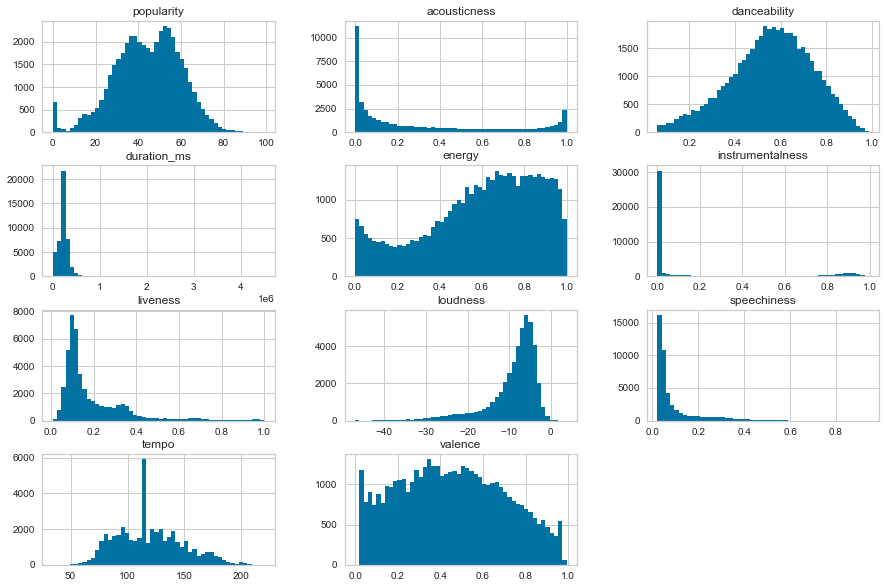

In [16]:
#Check the distributions of numerical data.
clean_data.hist(bins=50, figsize=(15, 10))

* A lot of these features look like they may have hidden null values, explore for them
* Instrumentalness and acousticness seem to have a LOT of 0s 

In [17]:
#Count home many instances of duration_ms are -1
null_count = 0

for i in clean_data['duration_ms']:
    if i < 0:
        null_count += 1

print(null_count)

#Double check for hidden nans

#Same thing with acousticness
null_count = 0

for i in clean_data['acousticness']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

#instrumentalness
null_count = 0

for i in clean_data['instrumentalness']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

#popularity
null_count = 0

for i in clean_data['popularity']:
    if i < 0 or i > 99:
        null_count += 1

print(null_count)

#speechiness
null_count = 0

for i in clean_data['speechiness']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

#loudness
null_count = 0

for i in clean_data['loudness']:
    if i > 0:
        null_count += 1

print(null_count)

#valence
null_count = 0

for i in clean_data['valence']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

#energy
null_count = 0

for i in clean_data['energy']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

#danceability
null_count = 0

for i in clean_data['danceability']:
    if i < 0 or i > 1:
        null_count += 1

print(null_count)

4484
0
0
0
0
43
0
0
0


In [18]:
#Duration of -1 seems to be major concern

#Impute median for rows with a duration of -1

duration_median = clean_data['duration_ms'].median()

clean_data.loc[clean_data['duration_ms'] == -1, 'duration_ms'] = duration_median

clean_data = clean_data.drop(clean_data[clean_data.duration_ms == -1].index)

#Reset the index as well
clean_data = clean_data.reset_index(drop=True)

#Do this for test data as well

#duration_median = test_data['duration_ms'].median()

test_data.loc[test_data['duration_ms'] == -1, 'duration_ms'] = duration_median

test_data = test_data.drop(test_data[test_data.duration_ms == -1].index)

test_data = test_data.reset_index(drop=True)


clean_data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,64,0.118000,0.770,188707,0.655,0.023400,D,0.1250,-5.369,Major,0.0316,129.9640,0.639,Rock
1,0,0.991000,0.234,412587,0.328,0.884000,F,0.1240,-17.296,Minor,0.0377,88.9500,0.230,Classical
2,37,0.805000,0.669,281147,0.348,0.021500,D,0.1150,-11.636,Major,0.0267,100.8390,0.421,Country
3,60,0.000985,0.856,162253,0.540,0.000016,F#,0.0854,-9.729,Minor,0.3730,158.0500,0.387,Rap
4,68,0.188000,0.745,152453,0.656,0.003370,A#,0.0941,-6.393,Major,0.0405,105.3180,0.858,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,70,0.153000,0.718,215305,0.454,0.000046,G#,0.1160,-9.012,Major,0.1270,89.4830,0.196,Rap
44996,27,0.000397,0.458,277533,0.906,0.000025,B,0.0773,-3.142,Major,0.0370,147.0200,0.570,Anime
44997,65,0.431000,0.566,233467,0.766,0.000000,D,0.1010,-5.036,Major,0.0399,113.7305,0.547,Rock
44998,57,0.771000,0.690,92599,0.292,0.851000,G#,0.0990,-8.341,Minor,0.0417,113.7305,0.317,Jazz


# Data Normalization

count    45000.000000
mean         0.181470
std          0.325064
min          0.000000
25%          0.000000
50%          0.000164
75%          0.155000
max          0.996000
Name: instrumentalness, dtype: float64
0    0.0
dtype: float64


<AxesSubplot:>

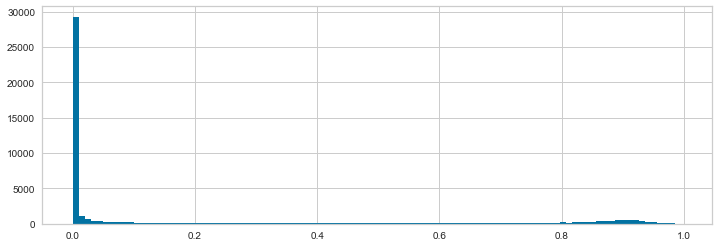

In [19]:
#looking at instumentalnesss more closely

print(clean_data['instrumentalness'].describe())
print(clean_data['instrumentalness'].mode())
clean_data['instrumentalness'].hist(bins=100, figsize=(12,4))

count    45000.000000
mean         0.307046
std          0.341578
min          0.000000
25%          0.020300
50%          0.145000
75%          0.553000
max          0.996000
Name: acousticness, dtype: float64
0    0.995
dtype: float64


<AxesSubplot:>

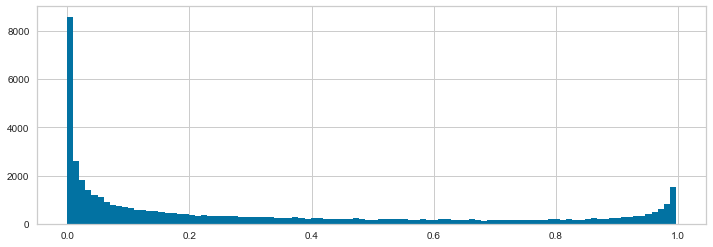

In [20]:
#looking at acousticness more closely

print(clean_data['acousticness'].describe())
print(clean_data['acousticness'].mode())
clean_data['acousticness'].hist(bins=100, figsize=(12,4))

In [21]:
#Need to normalize or standardize these features for PCA purposes
sub_data = clean_data[['acousticness', 'instrumentalness']]

norm = Normalizer()
norm_data = norm.transform(sub_data)

norm_data = pd.DataFrame(norm_data)


print(norm_data.skew())

sub_data.skew()

0   -1.614483
1    0.907301
dtype: float64


acousticness        0.878682
instrumentalness    1.488206
dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

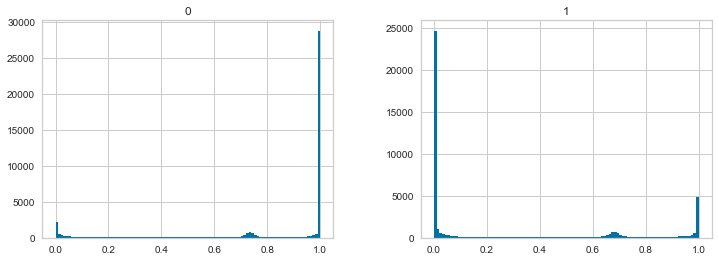

In [22]:
#data after normalizing

norm_data.hist(bins=100, figsize=(12,4))

In [23]:
#Try a sqrt transformation instead

sqrt_data = pd.DataFrame()

sqrt_data['acousticness'] = np.sqrt(sub_data['acousticness'])
sqrt_data['instrumentalness'] = np.sqrt(sub_data['instrumentalness'])


#Do this for test data as well since this was the chosen transformation

sub2_data = test_data[['acousticness', 'instrumentalness']]

sqrt2_data = pd.DataFrame()

sqrt2_data['acousticness'] = np.sqrt(sub2_data['acousticness'])
sqrt2_data['instrumentalness'] = np.sqrt(sub2_data['instrumentalness'])


print(sqrt_data.skew())

sub_data.skew()

acousticness        0.335869
instrumentalness    1.200613
dtype: float64


acousticness        0.878682
instrumentalness    1.488206
dtype: float64

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>]], dtype=object)

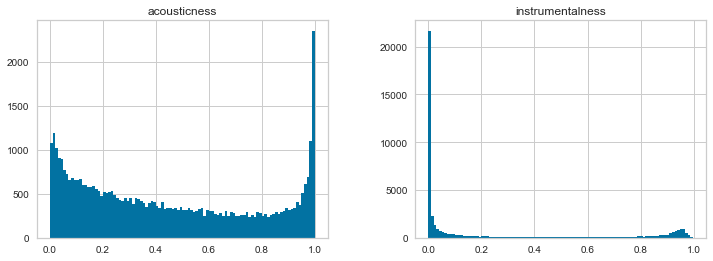

In [24]:
#data after sqrt transformation

sqrt_data.hist(bins=100, figsize=(12,4))

In [25]:
#Try a log transformation instead

log_data = pd.DataFrame()

log_data['acousticness'] = np.log1p(sub_data['acousticness'])
log_data['instrumentalness'] = np.log1p(sub_data['instrumentalness'])



print(log_data.skew())

sub_data.skew()

acousticness        0.701107
instrumentalness    1.405871
dtype: float64


acousticness        0.878682
instrumentalness    1.488206
dtype: float64

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>]], dtype=object)

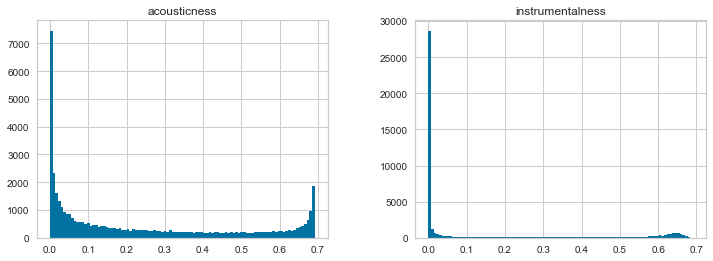

In [26]:
#data after sqrt transformation

log_data.hist(bins=100, figsize=(12,4))

Sqrt transformation seems to give the best results

G     5159
C     4959
C#    4857
D     4737
A     4330
F     3936
B     3406
E     3369
A#    3038
G#    3000
F#    2782
D#    1427
Name: key, dtype: int64


<AxesSubplot:>

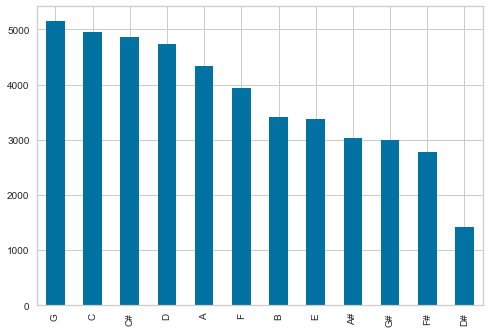

In [27]:
#Look at the category counts for some other variables.
# key
key_counts = clean_data['key'].value_counts()
print(key_counts)
key_counts.plot.bar()

Major    28929
Minor    16071
Name: mode, dtype: int64


<AxesSubplot:>

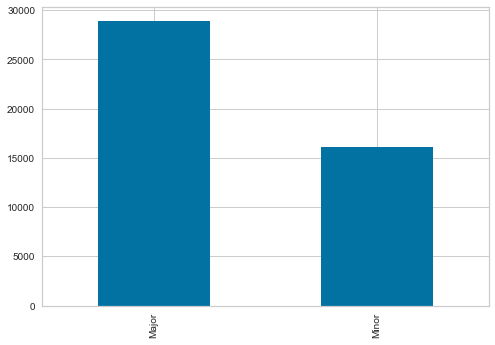

In [28]:
#mode
mode_counts = clean_data['mode'].value_counts()
print(mode_counts)
mode_counts.plot.bar()

Rap            4500
Blues          4500
Country        4500
Classical      4500
Jazz           4500
Electronic     4500
Alternative    4500
Rock           4500
Hip-Hop        4500
Anime          4500
Name: music_genre, dtype: int64


<AxesSubplot:>

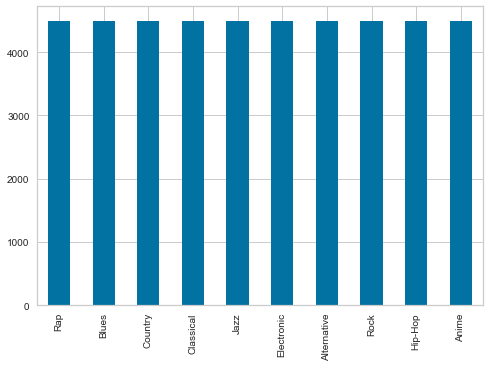

In [29]:
#music_genre
genre_counts = clean_data['music_genre'].value_counts()
print(genre_counts)
genre_counts.plot.bar()

Not many concerns with categorical data, need to one hot encode (reweigh if necessary)

## One hot encoding

In [30]:
#One hot encoding
#mode and key
clean_data = pd.get_dummies(clean_data, columns=['mode', 'key'])
clean_data.columns


#test data as well
test_data = pd.get_dummies(test_data, columns=['mode', 'key'])
test_data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'music_genre', 'mode_Major', 'mode_Minor', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#'],
      dtype='object')

In [31]:
clean_data

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,64,0.118000,0.770,188707,0.655,0.023400,0.1250,-5.369,0.0316,129.9640,...,0,0,0,1,0,0,0,0,0,0
1,0,0.991000,0.234,412587,0.328,0.884000,0.1240,-17.296,0.0377,88.9500,...,0,0,0,0,0,0,1,0,0,0
2,37,0.805000,0.669,281147,0.348,0.021500,0.1150,-11.636,0.0267,100.8390,...,0,0,0,1,0,0,0,0,0,0
3,60,0.000985,0.856,162253,0.540,0.000016,0.0854,-9.729,0.3730,158.0500,...,0,0,0,0,0,0,0,1,0,0
4,68,0.188000,0.745,152453,0.656,0.003370,0.0941,-6.393,0.0405,105.3180,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,70,0.153000,0.718,215305,0.454,0.000046,0.1160,-9.012,0.1270,89.4830,...,0,0,0,0,0,0,0,0,0,1
44996,27,0.000397,0.458,277533,0.906,0.000025,0.0773,-3.142,0.0370,147.0200,...,1,0,0,0,0,0,0,0,0,0
44997,65,0.431000,0.566,233467,0.766,0.000000,0.1010,-5.036,0.0399,113.7305,...,0,0,0,1,0,0,0,0,0,0
44998,57,0.771000,0.690,92599,0.292,0.851000,0.0990,-8.341,0.0417,113.7305,...,0,0,0,0,0,0,0,0,0,1


# Dimension reduction

In [32]:
#Do a PCA on feature variables:

#get normalized features
X =  clean_data.drop(columns = 'music_genre')
X['acousticness'] = sqrt_data['acousticness']
X['instrumentalness'] = sqrt_data['instrumentalness']

#do the same for the test set

X2 = test_data.drop(columns = 'music_genre')
X2['acousticness'] = sqrt2_data['acousticness']
X2['instrumentalness'] = sqrt2_data['instrumentalness']

X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,64,0.343511,0.770,188707,0.655,0.152971,0.1250,-5.369,0.0316,129.9640,...,0,0,0,1,0,0,0,0,0,0
1,0,0.995490,0.234,412587,0.328,0.940213,0.1240,-17.296,0.0377,88.9500,...,0,0,0,0,0,0,1,0,0,0
2,37,0.897218,0.669,281147,0.348,0.146629,0.1150,-11.636,0.0267,100.8390,...,0,0,0,1,0,0,0,0,0,0
3,60,0.031385,0.856,162253,0.540,0.003937,0.0854,-9.729,0.3730,158.0500,...,0,0,0,0,0,0,0,1,0,0
4,68,0.433590,0.745,152453,0.656,0.058052,0.0941,-6.393,0.0405,105.3180,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,70,0.391152,0.718,215305,0.454,0.006782,0.1160,-9.012,0.1270,89.4830,...,0,0,0,0,0,0,0,0,0,1
44996,27,0.019925,0.458,277533,0.906,0.005030,0.0773,-3.142,0.0370,147.0200,...,1,0,0,0,0,0,0,0,0,0
44997,65,0.656506,0.566,233467,0.766,0.000000,0.1010,-5.036,0.0399,113.7305,...,0,0,0,1,0,0,0,0,0,0
44998,57,0.878066,0.690,92599,0.292,0.922497,0.0990,-8.341,0.0417,113.7305,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Also need to do some standard scaling on some features
scaler = StandardScaler()
scaler.fit(X.iloc[:,:11])
scal_data = scaler.transform(X.iloc[:,:11])

scal_data = pd.DataFrame(scal_data)

#Transform the test set too
scal_test_data = scaler.transform(X2.iloc[:,:11])

scal_test_data = pd.DataFrame(scal_test_data)

scal_data

,0,1,2,3,4,5,6,7,8,9,10
0,1.271286,-0.305746,1.184304,-0.516145,0.211205,-0.228780,-0.426695,0.612162,-0.611354,0.366515,0.739151
1,-2.841101,1.665794,-1.814904,1.622295,-1.024474,1.984221,-0.432879,-1.322129,-0.551053,-1.041999,-0.914388
2,-0.463627,1.368626,0.619155,0.366816,-0.948898,-0.246608,-0.488537,-0.404204,-0.659793,-0.633704,-0.142198
3,1.014262,-1.249596,1.665520,-0.768827,-0.223361,-0.647726,-0.671588,-0.094932,2.763517,1.331051,-0.279656
4,1.528310,-0.033355,1.044416,-0.862434,0.214984,-0.495605,-0.617786,0.446092,-0.523374,-0.479885,1.624542
...,...,...,...,...,...,...,...,...,...,...,...
44995,1.656822,-0.161683,0.893336,-0.262089,-0.548341,-0.639727,-0.482352,0.021350,0.331712,-1.023694,-1.051846
44996,-1.106188,-1.284250,-0.561504,0.332296,1.159693,-0.644653,-0.721680,0.973331,-0.557973,0.952256,0.460192
44997,1.335542,0.640729,0.042814,-0.088610,0.630656,-0.658793,-0.575115,0.666167,-0.529306,-0.190980,0.367206
44998,0.821494,1.310712,0.736661,-1.434143,-1.160512,1.934420,-0.587484,0.130171,-0.511512,-0.190980,-0.562657


In [34]:
X_scal = pd.concat([scal_data, X.iloc[:,11:]], axis=1)

X2_scal = pd.concat([scal_test_data, X2.iloc[:,11:]], axis=1)

<AxesSubplot:>

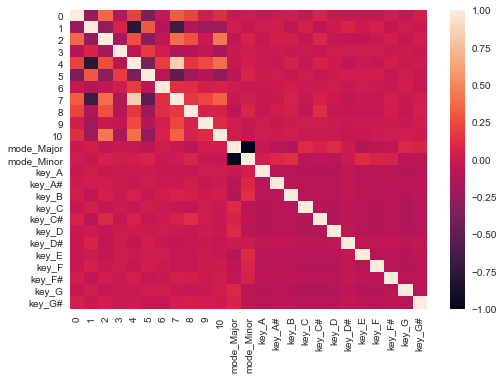

In [35]:
sns.heatmap(X_scal.corr())

In [36]:
#Setup PCA and compute the PCA tranformation
pca = PCA()
pca.fit(scal_data)
data_t = pca.transform(scal_data)
eigenv = pca.explained_variance_
loadings = pca.components_



In [37]:
#do the same on the test set
data_t2 = pca.transform(scal_test_data)

(0.0, 10.0)

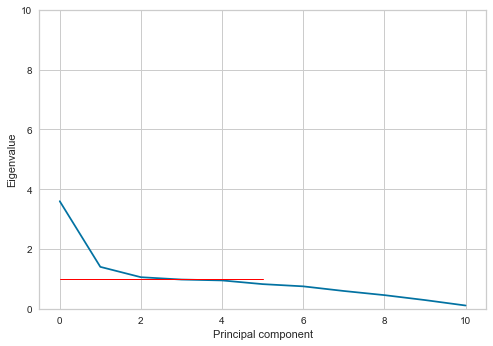

In [38]:
#Scree plots.
plt.plot(eigenv)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,5],[1,1],color='red',linewidth=1) # Kaiser criterion line
ax = plt.gca()
ax.set_ylim([0, 10])

In [39]:
eigenv

array([3.59719005, 1.40104171, 1.0553974 , 0.97723239, 0.94730299,
       0.82378054, 0.7493056 , 0.59419838, 0.45571615, 0.29055619,
       0.10852305])

First 3 PCs have an eigenvalue above 1. Also seems to be where eigvalues flatten out.
Go with 3 PCs

Text(0.5, 1.0, 'PC1')

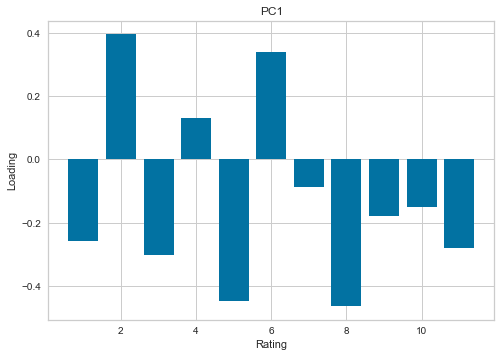

In [40]:
plt.bar(np.linspace(1,11,11),np.transpose(loadings)[:,0])
plt.xlabel('Rating')
plt.ylabel('Loading')
plt.title('PC1')

### PC1, Songs that are...
* quiet and less energetic, but high in intrumentalness and acousticness.
* Less popular and not very danceable
* Somewhat slow and less speech

Text(0.5, 1.0, 'PC2')

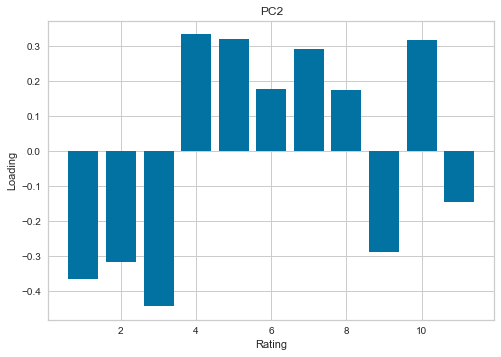

In [41]:
plt.bar(np.linspace(1,11,11),np.transpose(loadings)[:,1])
plt.xlabel('Rating')
plt.ylabel('Loading')
plt.title('PC2')

### PC2, Songs that are...
* Not popular, no acoustics, not danceable
* Long, energetic, lively, loud, fast tempo
* No speech

Text(0.5, 1.0, 'PC3')

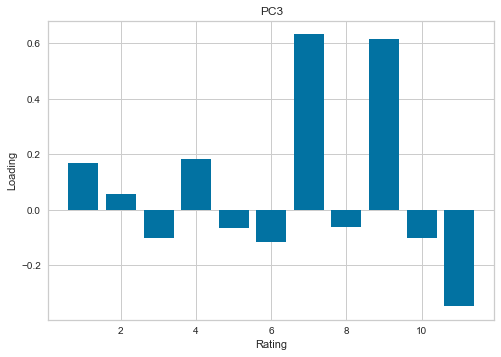

In [42]:
plt.bar(np.linspace(1,11,11),np.transpose(loadings)[:,2])
plt.xlabel('Rating')
plt.ylabel('Loading')
plt.title('PC3')

### PC3, Songs that are...
* VERY lively and high in speech
* Less valence
* longer than avg

In [43]:
#add labels and add dummy variables back

pca_results = pd.DataFrame(data_t[:,:3], columns=['PC1', 'PC2', 'PC3'])
pca_results = pd.concat([pca_results, X.iloc[:,11:]], axis=1)
pca_results.insert(0, 'music_genre', clean_data['music_genre'])

#test data too
pca_results2 = pd.DataFrame(data_t2[:,:3], columns=['PC1', 'PC2', 'PC3'])
pca_results2 = pd.concat([pca_results2, X2.iloc[:,11:]], axis=1)
pca_results2.insert(0, 'music_genre', test_data['music_genre'])

test_data_pca = pca_results2

X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,64,0.343511,0.770,188707,0.655,0.152971,0.1250,-5.369,0.0316,129.9640,...,0,0,0,1,0,0,0,0,0,0
1,0,0.995490,0.234,412587,0.328,0.940213,0.1240,-17.296,0.0377,88.9500,...,0,0,0,0,0,0,1,0,0,0
2,37,0.897218,0.669,281147,0.348,0.146629,0.1150,-11.636,0.0267,100.8390,...,0,0,0,1,0,0,0,0,0,0
3,60,0.031385,0.856,162253,0.540,0.003937,0.0854,-9.729,0.3730,158.0500,...,0,0,0,0,0,0,0,1,0,0
4,68,0.433590,0.745,152453,0.656,0.058052,0.0941,-6.393,0.0405,105.3180,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,70,0.391152,0.718,215305,0.454,0.006782,0.1160,-9.012,0.1270,89.4830,...,0,0,0,0,0,0,0,0,0,1
44996,27,0.019925,0.458,277533,0.906,0.005030,0.0773,-3.142,0.0370,147.0200,...,1,0,0,0,0,0,0,0,0,0
44997,65,0.656506,0.566,233467,0.766,0.000000,0.1010,-5.036,0.0399,113.7305,...,0,0,0,1,0,0,0,0,0,0
44998,57,0.878066,0.690,92599,0.292,0.922497,0.0990,-8.341,0.0417,113.7305,...,0,0,0,0,0,0,0,0,0,1


In [44]:
print(test_data_pca.isnull().sum())

music_genre    0
PC1            0
PC2            0
PC3            0
mode_Major     0
mode_Minor     0
key_A          0
key_A#         0
key_B          0
key_C          0
key_C#         0
key_D          0
key_D#         0
key_E          0
key_F          0
key_F#         0
key_G          0
key_G#         0
dtype: int64


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

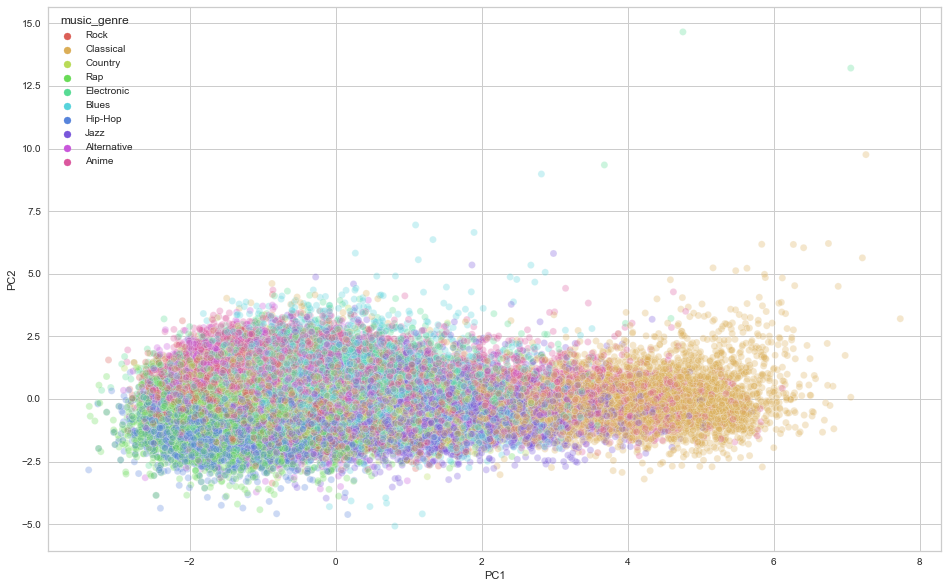

In [45]:
# visualize, PCA data from 3 different angles
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="music_genre",
    palette=sns.color_palette("hls", 10),
    data=pca_results,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

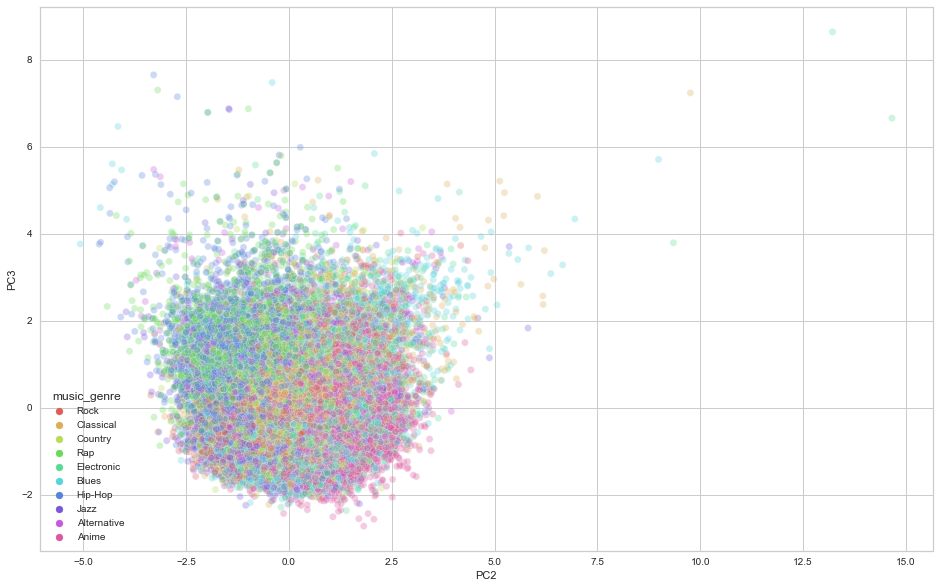

In [46]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC2", y="PC3",
    hue="music_genre",
    palette=sns.color_palette("hls", 10),
    data=pca_results,
    legend="full",
    alpha=0.3
)

<AxesSubplot:xlabel='PC1', ylabel='PC3'>

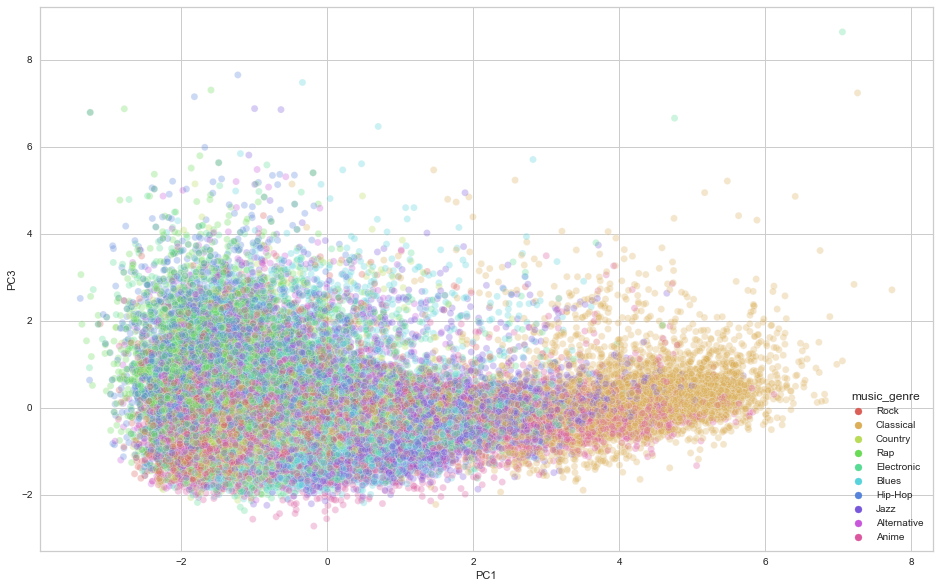

In [47]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PC1", y="PC3",
    hue="music_genre",
    palette=sns.color_palette("hls", 10),
    data=pca_results,
    legend="full",
    alpha=0.3
)

In [103]:
#look at t-SNE as well

#RUNTIME is long, takes about 15 min

#Make a model with perplexity of 50
tsne = TSNE(perplexity=50)
data_TSNE = tsne.fit_transform(scal_data)    


In [104]:
#Add labels
tsne_results = pd.DataFrame(data_TSNE, columns=['comp1', 'comp2'])
tsne_results.insert(2, 'music_genre', clean_data['music_genre'])

<AxesSubplot:xlabel='comp1', ylabel='comp2'>

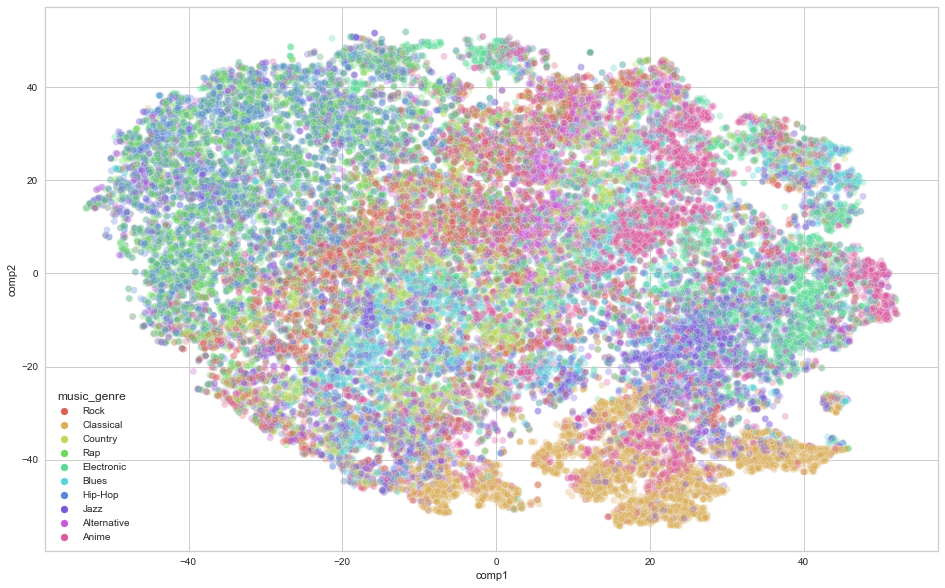

In [105]:
# visualize
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="comp1", y="comp2",
    hue="music_genre",
    palette=sns.color_palette("hls", 10),
    data=tsne_results,
    legend="full",
    alpha=0.3
)

# Testing models with non-reduced data

In [51]:
#Train test split (in training set)

#First without PCA data

#Need to make it so that 5000 of each genre is represented.
#90/10 split for each as well.

Y = clean_data['music_genre']

#Y = label_binarize(Y, classes=[0,1,2,3,4,5,6,7,8,9])
#n_classes = 10

#Stratify so that we have the train/test split specified in the spec sheet.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=7, shuffle=True, stratify=Y)

In [52]:
#setup a Random forest model to predict the genre

forest = RandomForestClassifier(n_estimators=100, random_state=7)
forest.fit(X_train, Y_train)


RandomForestClassifier(random_state=7)

In [53]:
#Check accuracy

Y_pred = forest.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.538

In [54]:
Y_pred_proba = forest.predict_proba(X_test)

auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")

print('AUC Score: ',auc)


One-vs-Rest ROC AUC scores:
0.913310 (macro),
0.913310 (weighted by prevalence)


In [55]:
#AdaBoost

boost = AdaBoostClassifier(n_estimators=100, learning_rate=1)
boost.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [56]:
#Auc
Y_pred_proba = boost.predict_proba(X_test)

auc = roc_auc_score(Y_test, Y_pred_proba, multi_class='ovr')
print('AUC Score: ',auc)


AUC Score:  0.845518463648834


In [57]:
#Accuracy
Y_pred = boost.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.47555555555555556

In [58]:
#SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(X_train, Y_train)

SGDClassifier()

In [59]:
#Accuracy
Y_pred = sgdc.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.1

In [60]:
#logsitic regression
log = LogisticRegression(multi_class='ovr')
log.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr')

In [61]:
#Auc
Y_pred_proba = log.predict_proba(X_test)

auc = roc_auc_score(Y_test, Y_pred_proba, multi_class='ovr')
print('AUC Score: ',auc)


AUC Score:  0.7510327572016461


In [62]:
#Accuracy
Y_pred = log.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.29088888888888886

# Testing models with PCA data

In [63]:
#Train test split on PCA data (in training set)

Xpca =  pca_results.drop(columns ='music_genre')

#Y = label_binarize(Y, classes=[0,1,2,3,4,5,6,7,8,9])
#n_classes = 10


#Stratify so that we have the train/test split specified in the spec sheet.

Xpca_train, Xpca_test, Ypca_train, Ypca_test = train_test_split(Xpca, Y, test_size=0.1, random_state=7, shuffle=True, stratify=Y)

In [64]:
#Random forest on pca data
forest_pca = RandomForestClassifier(n_estimators=100, random_state=7)
forest_pca.fit(Xpca_train, Ypca_train)

RandomForestClassifier(random_state=7)

In [65]:
#Get AUC
Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)

auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class='ovr')
print('AUC Score: ',auc)


AUC Score:  0.794229218106996


In [66]:
#accuracy score
Ypca_pred = forest_pca.predict(Xpca_test)
accuracy_score(Ypca_test, Ypca_pred)

0.3217777777777778

In [67]:
#AdaBoost

boost = AdaBoostClassifier(n_estimators=100, learning_rate=1)
boost.fit(Xpca_train, Ypca_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [68]:
#Auc
Ypca_pred_proba = boost.predict_proba(Xpca_test)

auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class='ovr')
print('AUC Score: ',auc)


AUC Score:  0.6897479835390946


In [69]:
#Accuracy
Ypca_pred = boost.predict(Xpca_test)
accuracy_score(Ypca_test, Ypca_pred)

0.3348888888888889

In [70]:
#SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(Xpca_train, Ypca_train)

SGDClassifier()

In [71]:
#Accuracy
Ypca_pred = sgdc.predict(Xpca_test)
accuracy_score(Ypca_test, Ypca_pred)

0.2717777777777778

In [72]:
#logsitic regression
log = LogisticRegression(multi_class='ovr')
log.fit(Xpca_train, Ypca_train)

LogisticRegression(multi_class='ovr')

In [73]:
#Auc
Ypca_pred_proba = log.predict_proba(Xpca_test)

auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class='ovr')
print('AUC Score: ',auc)


AUC Score:  0.7958035665294925


In [74]:
#Accuracy
Ypca_pred = log.predict(Xpca_test)
accuracy_score(Ypca_test, Ypca_pred)

0.3422222222222222

## Random forest seems to be the best performer in both the PCA and non-PCA data (overall)
### Based on quick tests with accuracy and AUC (one vs rest avg)
### Use Random forest as the model

# Parameter Tuning

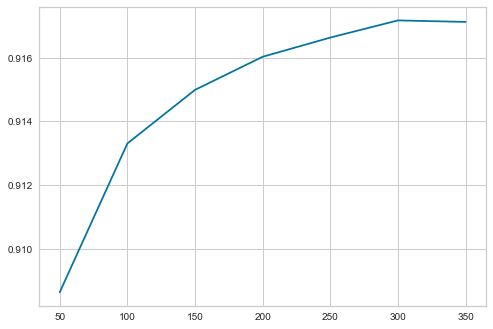

In [75]:
#Optimal number of estimators

est_list = []
auc_list = []

for est in range(50, 400, 50):
    #Fit model
    forest = RandomForestClassifier(n_estimators=est, random_state=7)
    forest.fit(X_train, Y_train)
    
    #Get AUC and record
    Y_pred_proba = forest.predict_proba(X_test)
    auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")
    
    est_list.append(est)
    auc_list.append(auc)
    
plt.plot(est_list,auc_list)

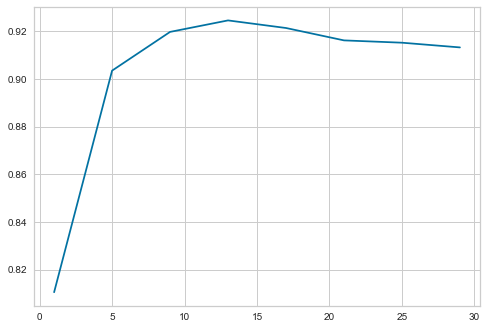

In [76]:
#max_depth

dep_list = []
auc_list = []

for dep in range(1, 33, 4):
    #Fit model
    forest = RandomForestClassifier(max_depth=dep, random_state=7)
    forest.fit(X_train, Y_train)
    
    #Get AUC and record
    Y_pred_proba = forest.predict_proba(X_test)
    auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")
    
    dep_list.append(dep)
    auc_list.append(auc)
    
plt.plot(dep_list,auc_list)

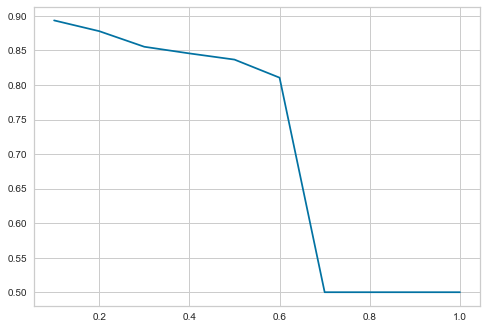

In [77]:
#min_samples_split

split_list = []
auc_list = []

for split in np.linspace(0.1, 1.0, 10, endpoint=True):
    #Fit model
    forest = RandomForestClassifier(min_samples_split = split, random_state=7)
    forest.fit(X_train, Y_train)
    
    #Get AUC and record
    Y_pred_proba = forest.predict_proba(X_test)
    auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")
    
    split_list.append(split)
    auc_list.append(auc)
    
plt.plot(split_list,auc_list)

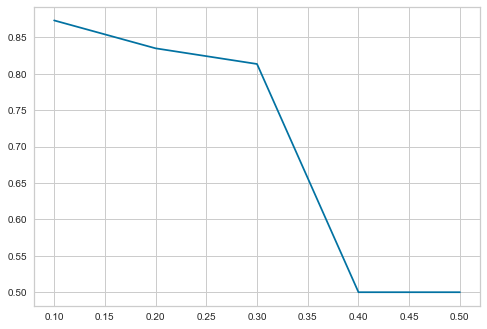

In [78]:
#min_samples_leaf

leaf_list = []
auc_list = []

for leaf in np.linspace(0.1, 0.5, 5, endpoint=True):
    #Fit model
    forest = RandomForestClassifier(min_samples_leaf=leaf, random_state=7)
    forest.fit(X_train, Y_train)
    
    #Get AUC and record
    Y_pred_proba = forest.predict_proba(X_test)
    auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")
    
    leaf_list.append(leaf)
    auc_list.append(auc)
    
plt.plot(leaf_list,auc_list)

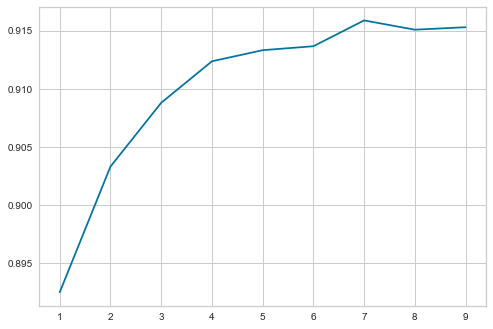

In [79]:
#max_features

feat_list = []
auc_list = []

for feat in range(1, 10):
    #Fit model
    forest = RandomForestClassifier(max_features=feat, random_state=7)
    forest.fit(X_train, Y_train)
    
    #Get AUC and record
    Y_pred_proba = forest.predict_proba(X_test)
    auc = roc_auc_score(Y_test, Y_pred_proba, multi_class="ovr")
    
    feat_list.append(feat)
    auc_list.append(auc)
    
plt.plot(feat_list,auc_list)

In [80]:
#Also try RandomizedSearchCV

# Grid of features
n_estimators = [int(x) for x in np.linspace(100, 350, 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 15, 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [100, 162, 225, 287, 350],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 7, 10, 12, 15, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [81]:
# This cell took me 8 min to run

searchCV = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit the random search model
searchCV.fit(X_train, Y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.4min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_features=9,
                                                    random_state=7),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 12, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 162, 225, 287,
                                                         350]},
                   random_state=42, verbose=2)

In [82]:
searchCV.best_params_

{'n_estimators': 287,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

#### Same thing with PCA Random Forest

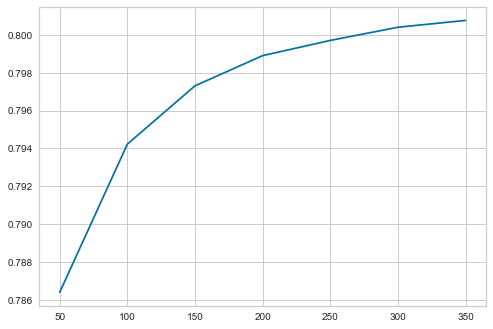

In [83]:
#Optimal number of estimators

est_list = []
auc_list = []

for est in range(50, 400, 50):
    #Fit model
    forest_pca = RandomForestClassifier(n_estimators=est, random_state=7)
    forest_pca.fit(Xpca_train, Ypca_train)
    
    #Get AUC and record
    Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)
    auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class="ovr")
    
    est_list.append(est)
    auc_list.append(auc)
    
plt.plot(est_list,auc_list)

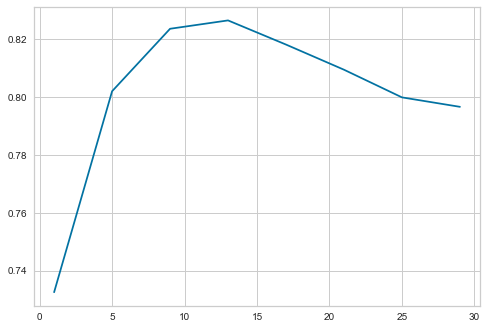

In [84]:
#max_depth

dep_list = []
auc_list = []

for dep in range(1, 33, 4):
    #Fit model
    forest_pca = RandomForestClassifier(max_depth=dep, random_state=7)
    forest_pca.fit(Xpca_train, Ypca_train)
    
    #Get AUC and record
    Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)
    auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class="ovr")
    
    dep_list.append(dep)
    auc_list.append(auc)
    
plt.plot(dep_list,auc_list)

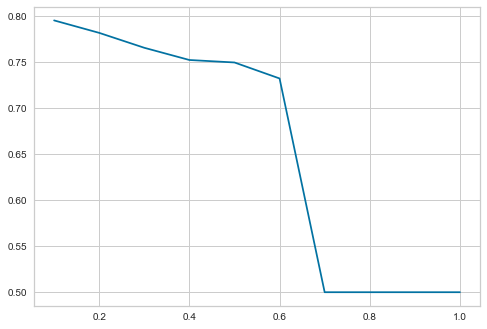

In [85]:
#min_samples_split

split_list = []
auc_list = []

for split in np.linspace(0.1, 1.0, 10, endpoint=True):
    #Fit model
    forest_pca = RandomForestClassifier(min_samples_split = split, random_state=7)
    forest_pca.fit(Xpca_train, Ypca_train)
    
    #Get AUC and record
    Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)
    auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class="ovr")
    
    split_list.append(split)
    auc_list.append(auc)
    
plt.plot(split_list,auc_list)

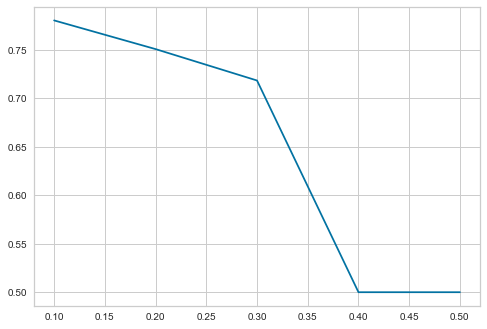

In [86]:
#min_samples_leaf

leaf_list = []
auc_list = []

for leaf in np.linspace(0.1, 0.5, 5, endpoint=True):
    #Fit model
    forest_pca = RandomForestClassifier(min_samples_leaf=leaf, random_state=7)
    forest_pca.fit(Xpca_train, Ypca_train)
    
    #Get AUC and record
    Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)
    auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class="ovr")
    
    leaf_list.append(leaf)
    auc_list.append(auc)
    
plt.plot(leaf_list,auc_list)

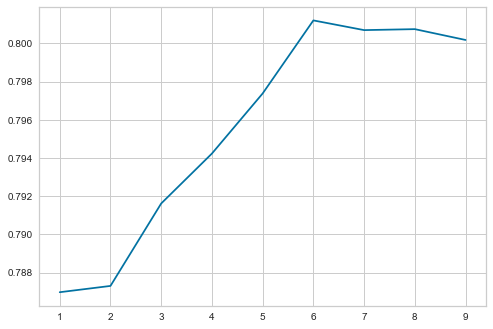

In [87]:
#max_features

feat_list = []
auc_list = []

for feat in range(1, 10,):
    #Fit model
    forest_pca = RandomForestClassifier(max_features=feat, random_state=7)
    forest_pca.fit(Xpca_train, Ypca_train)
    
    #Get AUC and record
    Ypca_pred_proba = forest_pca.predict_proba(Xpca_test)
    auc = roc_auc_score(Ypca_test, Ypca_pred_proba, multi_class="ovr")
    
    feat_list.append(feat)
    auc_list.append(auc)
    
plt.plot(feat_list,auc_list)

In [88]:
# this cell took me 5 min to run

searchCV_pca = RandomizedSearchCV(estimator = forest_pca, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#Fit the random search model
searchCV_pca.fit(Xpca_train, Ypca_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\justi\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_features=9,
                                                    random_state=7),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 7, 10, 12, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 162, 225, 287,
                                                         350]},
                   random_state=42, verbose=2)

In [89]:
searchCV_pca.best_params_

{'n_estimators': 287,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': True}

# Testing Final models on test data, AUROC, Feature importance and clusters


In [106]:
Y2 = test_data['music_genre']

In [107]:
#Fit the Random forest model on the training data
forest = RandomForestClassifier(n_estimators=300,
                                max_depth=15,
                                max_features='sqrt',
                                min_samples_split=10,
                                min_samples_leaf=4,
                                random_state=7,
                                bootstrap=True)
forest.fit(X, Y)


RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=300, random_state=7)

In [108]:
#Test data 
Y2_pred_proba = forest.predict_proba(X2)
Y2_pred = forest.predict(X2)

In [109]:
#metrics

#AUC
auc = roc_auc_score(Y2, Y2_pred_proba, multi_class="ovr")
#accuracy
acc = accuracy_score(Y2, Y2_pred)

print('AUC: ', auc)
print('Accuracy: ', acc)

AUC:  0.9250455555555556
Accuracy:  0.5616


<AxesSubplot:>

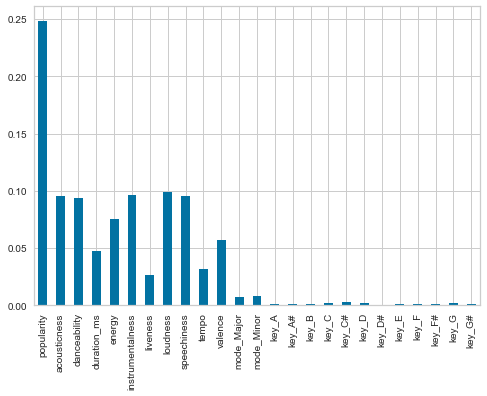

In [110]:
#Important features
importances = forest.feature_importances_

feature_names = X.columns

forest_importances = pd.Series(importances, index=feature_names)

forest_importances.plot.bar()

In [111]:
# Using the yellowbrick library to plot AUROC
# Thanks to this link:
# https://medium.com/swlh/how-to-create-an-auc-roc-plot-for-a-multiclass-model-9e13838dd3de

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={k: k  for i, k in enumerate(forest.classes_)})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    
    return visualizer

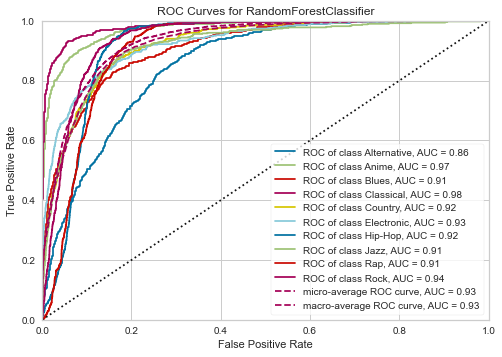

dict_keys(['ax', 'binary', 'classes', 'encoder', 'estimator', 'force_model', 'is_fitted', 'macro', 'micro', 'per_class']) 


dict_keys(['ax', 'binary', 'classes', 'encoder', 'estimator', 'force_model', 'is_fitted', 'macro', 'micro', 'per_class']) 




C:\Users\justi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={'Alternative': 'Alternative', 'Anime': 'Anime',
                'Blues': 'Blues', 'Classical': 'Classical',
                'Country': 'Country', 'Electronic': 'Electronic',
                'Hip-Hop': 'Hip-Hop', 'Jazz': 'Jazz', 'Rap': 'Rap',
                'Rock': 'Rock'},
       estimator=RandomForestClassifier(max_depth=15, max_features='sqrt',
                                        min_samples_leaf=4,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=7))

In [112]:
#AUROC plots for each target label

plot_ROC_curve(forest, X, Y, X2, Y2)

In [113]:
{'n_estimators': 287,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': True}

{'n_estimators': 287,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': True}

In [114]:
#PCA model fitting

forest_pca = RandomForestClassifier(n_estimators=300,
                                max_depth=12,
                                max_features='sqrt',
                                min_samples_split=2,
                                min_samples_leaf=2,
                                random_state=7,
                                bootstrap=True)
forest_pca.fit(Xpca, Y)

RandomForestClassifier(max_depth=12, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=300, random_state=7)

In [115]:
#Setting up data
X_test_data_pca = test_data_pca.drop(columns ='music_genre')
Y_test_data_Pca = test_data_pca['music_genre']

In [116]:
#PCA model testing

#Test data 
Y2pca_pred_proba = forest_pca.predict_proba(X_test_data_pca)
Y2pca_pred = forest_pca.predict(X_test_data_pca)

In [117]:
#metrics

#AUC
auc = roc_auc_score(Y2, Y2pca_pred_proba, multi_class="ovr")
#accuracy
acc = accuracy_score(Y2, Y2pca_pred)

print('AUC: ', auc)
print('Accuracy: ', acc)

AUC:  0.8241288000000001
Accuracy:  0.3516


<AxesSubplot:>

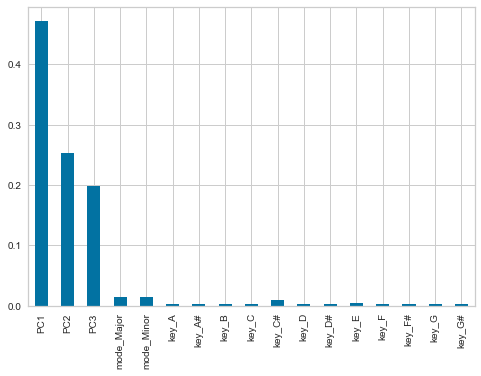

In [118]:
#Important Features of rpca model.

importances_pca = forest_pca.feature_importances_

feature_names = X_test_data_pca.columns

forest_importances_pca = pd.Series(importances_pca, index=feature_names)

forest_importances_pca.plot.bar()

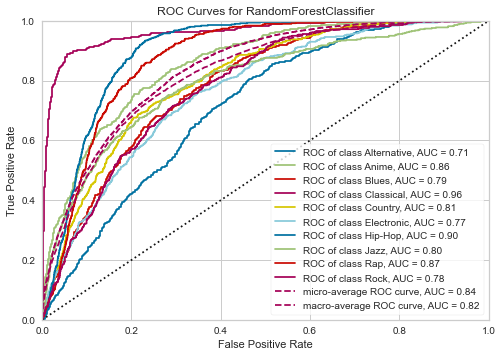

dict_keys(['ax', 'binary', 'classes', 'encoder', 'estimator', 'force_model', 'is_fitted', 'macro', 'micro', 'per_class']) 


dict_keys(['ax', 'binary', 'classes', 'encoder', 'estimator', 'force_model', 'is_fitted', 'macro', 'micro', 'per_class']) 




C:\Users\justi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       binary=None,
       encoder={'Alternative': 'Alternative', 'Anime': 'Anime',
                'Blues': 'Blues', 'Classical': 'Classical',
                'Country': 'Country', 'Electronic': 'Electronic',
                'Hip-Hop': 'Hip-Hop', 'Jazz': 'Jazz', 'Rap': 'Rap',
                'Rock': 'Rock'},
       estimator=RandomForestClassifier(max_depth=12, max_features='sqrt',
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=7))

In [119]:
#AUC plot
plot_ROC_curve(forest_pca, Xpca, Y, X_test_data_pca, Y2)